# Multiple Schemas

We have developed graphs which will depend only on one schema and once the graph is invoked, the complete graph is shown as output where sometimes this differ or we have special cases where we want to control this: 

- Nodes between may interact with a Private or Hidden state which doesn't have relation to the Graph

- Graphs may have two different schemas for each Input and Output.

## Case 1: Private/Hidden State

Let us create two different states each having individual variables. The Private/Hidden state lies in between but it returns back the Main State in return. So in-short, Private State acts as an intermediary, but not relevant for the overall graph input or output.

**Node_1** - modifies the value inside `MainState` and returns to `PrivateState`

**Node_2** - modifies the value inside `PrivateState` and returns to `MainState`

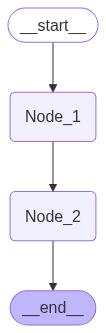

In [10]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

class MainState(TypedDict):
    foo: int 

class PrivateState(TypedDict):
    bar: int 

# Defining Node functions
def node_1(state: MainState) -> PrivateState: # MainState -> PrivateState
    print("__Node 1__")
    # updating the bar value and sending payload in form of PrivateState
    return { "bar" : state["foo"] + 1 }

def node_2(state: PrivateState) -> MainState: # PrivateState -> MainState
    print("__Node 2__")
    # using the help of PrivateState bar value to update the foo variable
    return { "foo" : state["bar"] + 1 }

# Creating graph 
builder = StateGraph(MainState)

builder.add_node("Node_1", node_1)
builder.add_node("Node_2", node_2)

builder.add_edge(START, "Node_1")
builder.add_edge("Node_1", "Node_2")
builder.add_edge("Node_2", END)

graph = builder.compile()

graph


In [11]:
graph.invoke({"foo" : 1})

__Node 1__
__Node 2__


{'foo': 3}

## Case 2: Graphs may have separate Input and Output Schemas

We will create three different state schemas - `InputState`, `OverallState` and `OutputState`

User will provide the input schema in one type, and the output gets varied and it will be different. 

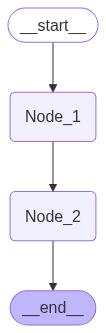

In [16]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

class InputState(TypedDict):
    question: str 

class OutputState(TypedDict):
    answer: str 

class OverallState(TypedDict):
    question: str
    answer: str
    notes: str

# Defining Node functions
def node_1(state: InputState) -> OverallState: # InputState -> OverallState
    print("__Node 1__")
    # updating the bar value and sending payload in form of Overall State
    return { "question" : state["question"], "answer" : "Hello There! How can I help you?", "notes" : "This is a placeholder." }

def node_2(state: OverallState) -> OutputState: # OverallState -> OutputState
    print("__Node 2__")
    # using the help of PrivateState bar value to update the foo variable
    return { "answer" : state["answer"]}

# Creating graph 
builder = StateGraph(OverallState, input=InputState, output=OutputState)

builder.add_node("Node_1", node_1)
builder.add_node("Node_2", node_2)

builder.add_edge(START, "Node_1")
builder.add_edge("Node_1", "Node_2")
builder.add_edge("Node_2", END)

graph = builder.compile()

graph


In [17]:
graph.invoke({"question" : "What is LangGraph?"})

__Node 1__
__Node 2__


{'answer': 'Hello There! How can I help you?'}